In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace= True)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first= True)

In [12]:
X = df.drop(columns=['Exited'])
Y = df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

In [20]:
model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

In [23]:
history = model.fit(x_train_scaled, y_train, epochs= 100, validation_split= 0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6042 - accuracy: 0.6995 - val_loss: 0.5042 - val_accuracy: 0.7981
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4631 - accuracy: 0.8058 - val_loss: 0.4388 - val_accuracy: 0.8206
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.8195 - val_loss: 0.4149 - val_accuracy: 0.8188
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8289 - val_loss: 0.3972 - val_accuracy: 0.8256
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3922 - accuracy: 0.8386 - val_loss: 0.3814 - val_accuracy: 0.8375
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8472 - val_loss: 0.3687 - val_accuracy: 0.8431
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3671 - accuracy: 0.8566 - val_loss: 0.3581 - val_accuracy: 0.8494

In [24]:
import matplotlib.pyplot as plt

In [25]:
history

In [26]:
history.history

{'loss': [0.6041992902755737,
  0.4630555212497711,
  0.42623674869537354,
  0.40777304768562317,
  0.3921598792076111,
  0.37838754057884216,
  0.36705195903778076,
  0.35871875286102295,
  0.3530783951282501,
  0.34905415773391724,
  0.34598007798194885,
  0.34440284967422485,
  0.34237349033355713,
  0.3411690592765808,
  0.339601069688797,
  0.33856651186943054,
  0.33764976263046265,
  0.337246298789978,
  0.3367161452770233,
  0.33564499020576477,
  0.33482828736305237,
  0.33394840359687805,
  0.33353516459465027,
  0.33280956745147705,
  0.3327392637729645,
  0.33222174644470215,
  0.3318633735179901,
  0.3310390114784241,
  0.33080023527145386,
  0.32993239164352417,
  0.33004868030548096,
  0.32899704575538635,
  0.32880687713623047,
  0.32865262031555176,
  0.3279804587364197,
  0.32763537764549255,
  0.3268471658229828,
  0.3265622854232788,
  0.32678261399269104,
  0.3264332711696625,
  0.3259049355983734,
  0.32559314370155334,
  0.32514485716819763,
  0.32543814182281494

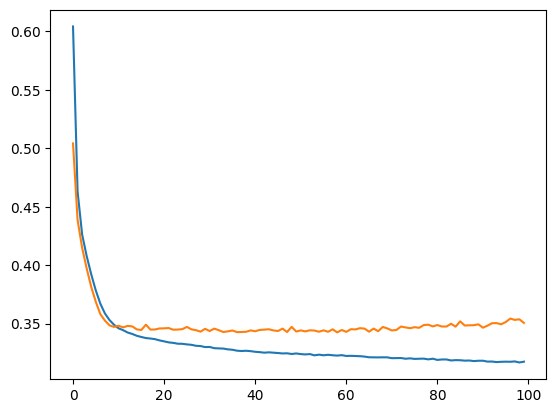

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

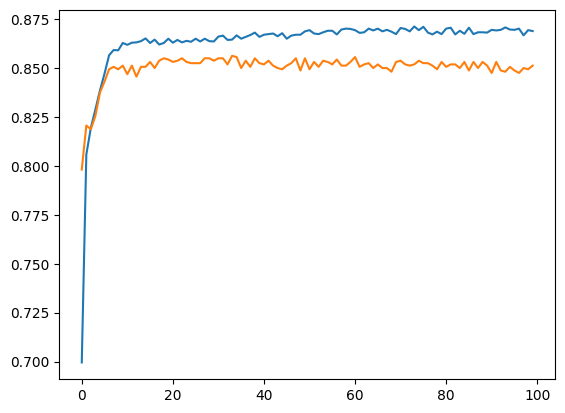

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [29]:
model.layers[0].get_weights()

[array([[ 0.33659127,  0.39767542, -0.11688848,  0.06256144, -0.16533758,
         -0.01847144,  0.03860534, -0.01102493,  0.0953581 ,  0.22129104,
          0.00743493],
        [-0.27721265,  0.4706868 , -0.85919076, -0.81208146,  0.3486602 ,
          0.81027305, -0.07472923,  1.0958781 , -0.3329616 ,  0.36132082,
          0.21073091],
        [-0.29131114, -0.38982543,  0.07279516, -0.25959635,  0.00816972,
         -0.4745159 , -0.19838421,  0.01613136, -0.20830923,  0.18390055,
          0.39350012],
        [ 0.551311  , -0.31097496, -0.00917867, -0.03003686,  0.04643942,
          0.50379777, -0.4473697 ,  0.4480719 , -0.14980645,  0.50924766,
         -0.6949831 ],
        [-0.20452067,  0.07097376,  0.0973812 ,  0.04729773, -0.19548716,
          0.6806494 , -1.1628469 , -0.4207098 ,  0.8887566 ,  0.8227701 ,
         -0.05275636],
        [-0.08940449,  0.11448029,  0.03191677, -0.01460344,  0.51313055,
          0.3945312 , -0.04989064,  0.10528163, -0.10437188, -0.3121756

In [30]:
model.layers[1].get_weights()

[array([[ 0.23524825, -0.29521742,  0.36609465,  0.52383775, -0.1111064 ,
          0.39165863,  0.5021445 ,  0.1758873 , -1.0090793 ,  0.38493216,
         -0.14108941],
        [ 0.43946898,  0.51516634, -0.22265245, -1.0744878 , -0.10197613,
         -0.05052047,  0.04893858, -0.27788994,  0.04088698,  0.05962976,
          0.24210007],
        [-1.0126423 ,  0.19767722,  0.4500135 , -0.03705065,  0.10926431,
          0.05484712,  0.15014432, -1.337051  ,  0.21287905,  0.25563893,
         -0.25655246],
        [-0.15931523,  0.46303886, -0.26001376,  0.3810382 ,  0.43404844,
          0.31332415,  0.6714758 , -1.2584038 ,  0.0386433 ,  0.09540735,
          0.32663077],
        [-0.09374303,  0.2619168 ,  0.40206525,  0.29113215, -0.35464966,
         -0.25812998,  0.29704276,  0.02890002, -0.6636892 , -0.23633453,
         -0.22272445],
        [ 0.19648089, -0.21943264,  0.3462279 , -0.634592  ,  0.14382465,
          0.00487678, -0.46336505, -0.22019804,  0.81825066,  0.1347929

In [31]:
model.predict(x_test_scaled)

63/63 [==============================] - 0s 2ms/step


array([[0.02468186],
       [0.13106571],
       [0.05300833],
       ...,
       [0.01505497],
       [0.02215266],
       [0.33414516]], dtype=float32)

In [32]:
y_log = model.predict(x_test_scaled)
y_pred = np.where(y_log > 0.5, 1, 0)

63/63 [==============================] - 0s 2ms/step


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred)

0.8615